In [1]:
import sys
import os
import glob
import importlib
from scipy.optimize import fmin
import scipy
import random
#

import numpy as np
import pylab as plt
import matplotlib
import math as m
from matplotlib import rc
from scipy import signal, fft
import sys
from scipy.optimize import curve_fit
from scipy.optimize import minimize
sys.path.append('C:\\Users\\bookw\\Documents\\Research')
from supportFile import findFFT,plotThingsEO,findFilename,geterr
# from globalVars import primes,IX,primesE,primesO,IXE,IXO,freq,tempfreq,TEMPFREQ,s,M
# from brokenaxes import brokenaxes
import seaborn as sns
sns.set_palette("deep")
import pandas as pd
from scipy.stats import wilcoxon, ttest_rel, friedmanchisquare, shapiro
import pickle as pickle

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


takeAvgBA = True

    
help = """
usage:
  analysis subject protocol [formats]

add filename formats to save files in those formats:
  visualization subject protocol png,mp4
"""
# importing protocol (su17v3)
sys.path.append('"C:\\Users\\bookw\\Documents\\Research\\EMG data')
# import su18CP as proto

## analyze for HCPS_021-HCPS_028

In [2]:
# want to define empty dictionary for FF controller error, time domain MSE, FA, and BA
Ferr_manual_fo = {}
timeerr_manual_fo = {}
FA_manual_fo = {}  
BA_manual_fo = {}

Ferr_EMG_fo = {}
timeerr_EMG_fo = {}
FA_EMG_fo = {}
BA_EMG_fo = {}

Ferr_manual_so = {}
timeerr_manual_so = {}
FA_manual_so = {}  
BA_manual_so = {}

Ferr_EMG_so = {}
timeerr_EMG_so = {}
FA_EMG_so = {}
BA_EMG_so = {}

Bonly_EMG_fo = {}
Bonly_manual_fo = {}
Bonly_EMG_so = {}
Bonly_manual_so = {}

time_EMG_fo = {}
time_manual_fo = {}
time_EMG_so = {}
time_manual_so = {}

FREQ_EMG_fo = {}
FREQ_manual_fo = {}
FREQ_EMG_so = {}
FREQ_manual_so = {}

primes = np.asarray([2, 3, 5, 7, 11, 13, 17, 19])# max =37
IX = primes*2
freq = np.linspace(0,599.5,1200)#refs.shape[0]/2)

s = 1.0j*2*m.pi*freq[IX]/20
soM = 1.0/(np.multiply(s,s)+s) # plus or minus s???
soM = np.asarray(soM)

foM = 1.0/(s)

keys = ['HCPS_021','HCPS_023','HCPS_024','HCPS_025','HCPS_026','HCPS_027','HCPS_028','HCPS_029','HCPS_030','HCPS_031','HCPS_032']

for key in keys:
    print('analyzing data for '+key)
    Ferr_EMG_fo[key],timeerr_EMG_fo[key],BA_EMG_fo[key],FA_EMG_fo[key],Bonly_EMG_fo[key],time_EMG_fo[key],FREQ_EMG_fo[key] = geterr(key+'\\'+key+'_EMGfo',foM)
    Ferr_manual_fo[key],timeerr_manual_fo[key],BA_manual_fo[key],FA_manual_fo[key],Bonly_manual_fo[key],time_manual_fo[key],FREQ_manual_fo[key] = geterr(key+'\\'+key+'_Manualfo',foM)
    Ferr_EMG_so[key],timeerr_EMG_so[key],BA_EMG_so[key],FA_EMG_so[key],Bonly_EMG_so[key],time_EMG_so[key],FREQ_EMG_so[key] = geterr(key+'\\'+key+'_EMGso',soM)
    Ferr_manual_so[key],timeerr_manual_so[key],BA_manual_so[key],FA_manual_so[key],Bonly_manual_so[key],time_manual_so[key],FREQ_manual_so[key]= geterr(key+'\\'+key+'_Manualso',soM)

print('all participants analyzed')

# ['EMGfo','EMGso','Manualfo','Manualso']
trial_order = [[1,3,2,4],
              [3,1,2,4],
              [4,3,1,2],
              [3,1,4,2],
              [2,4,3,1],
              [4,3,1,2],
              [4,3,1,2],
              [4,2,1,3],
              [1,3,2,4],
              [2,1,3,4],
              [4,3,1,2]]
trial_order = np.asarray(trial_order)



analyzing data for HCPS_021
analyzing data for HCPS_023
analyzing data for HCPS_024
analyzing data for HCPS_025
analyzing data for HCPS_026
analyzing data for HCPS_027
analyzing data for HCPS_028
analyzing data for HCPS_029
analyzing data for HCPS_030
analyzing data for HCPS_031
analyzing data for HCPS_032
all participants analyzed


In [3]:
for key in keys:
    for i,trial in FREQ_manual_so[key].items():
        REFS = trial['REFS']
        OUTS = trial['OUTS']
        INPS = trial['INPS']
        DISTS = trial['DISTS']

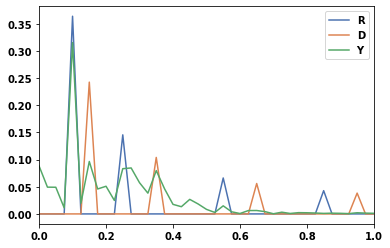

In [4]:
w = np.arange(0,1200)/40
plt.plot(w,np.abs(REFS),label='R')
plt.plot(w,np.abs(DISTS),label='D')
plt.plot(w,np.abs(OUTS),label='Y')
plt.legend()
plt.xlim(0,1);

freqs = [4,6,10,14,22,26,34,38]
even = freqs[::2]
odd = freqs[1::2]

In [ ]:
# the FreqEMG / FreqManual have the freq domains
# DISTS, REFS, etc -- fft(data)
# need a way to store the data from each participant at each of the stimulated freqs
# NOTE: this is just for manual (repeat for EMG, but keep separate)
# create array, 10x8
# then take average across participants
# then build fxn to minimize
# take fmin

Minimizing: FD_error -- EMG error + manual error
x0: 

In [5]:
M = lambda s : 1/(s**2 + s)

# [k_v,t_v,k,t_d]
def myfit(w,x0,x1,x2,x3):
    w = np.array(w)/40
    num =  M(1.j*2*np.pi*w) * x2 / (1.j*2*np.pi*w) * x0 * np.exp(-1.j*2*np.pi*w*x1)
    denom = 1 + M(1.j*2*np.pi*w) * x2 / (1.j*2*np.pi*w) * np.exp(-1.j*2*np.pi*w*x3)
    return num / denom

estimate = [0.38,0.190,2.5,0,0.40,0.145,2.5,0]
N = 1200; fs = 60
w_all = np.fft.fftfreq(N, 1./ fs)

# MAN == CONTROL

# [k_v,t_v,k,t_d] x 2
def COST8(EMGavg,MANavg,est): # the OG
    EMGfit = myfit(w[freqs],est[0],est[1],est[2],est[3])
    MANfit = myfit(w[freqs],est[4],est[5],est[6],est[7])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# the ks are equal
def COST7(EMGavg,MANavg,est): 
    EMGfit = myfit(w[freqs],est[0],est[1],est[6],est[3])
    MANfit = myfit(w[freqs],est[4],est[5],est[6],est[7])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# ks are equal and EMG feedback delay = man visual delay
def COST6(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],est[1],est[6],est[5])
    MANfit = myfit(w[freqs],est[4],est[5],est[6],est[7])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
# ks are equal and EMG feedback delay = EMG visual delay
def COST5(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],est[1],est[6],est[5])
    MANfit = myfit(w[freqs],est[4],est[5],est[6],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
# 5 vars, lowest variance
def COST55(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],est[1],est[6],est[1])
    MANfit = myfit(w[freqs],est[4],est[5],est[6],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
# hypothesis
def COSTh(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],est[1],est[6],est[1])
    MANfit = myfit(w[freqs],est[0],est[1],est[6],est[7])
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost) 

# [k_v,t_v,k,t_d]
# best 4 (lowest error)
def COST4(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],est[1],est[6],est[5])
    MANfit = myfit(w[freqs],est[0],est[5],est[6],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)     

# [k_v,t_v,k,t_d]
# best 4 (lowest variance)
def COST45(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],est[1],est[6],est[1])
    MANfit = myfit(w[freqs],est[0],est[5],est[6],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

# [k_v,t_v,k,t_d]
# best 3 (lowest variance)
def COST3(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],est[1],est[6],est[1])
    MANfit = myfit(w[freqs],est[0],est[1],est[6],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)



# next up: pure delay
# k, t_d both excluded
# [k_v,t_v,k,t_d]
def DEG1(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],est[1],w[freqs],0)
    MANfit = myfit(w[freqs],est[4],est[5],w[freqs],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)
    
def DEG2(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],est[4],w[freqs],0)
    MANfit = myfit(w[freqs],est[0],est[5],w[freqs],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)
    
def DEG3(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],est[1],w[freqs],0)
    MANfit = myfit(w[freqs],est[0],est[1],w[freqs],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)



# finally, pure gain
# [k_v,t_v,k,t_d]
# t_v, t_d = 0
def GAIN(EMGavg,MANavg,est):
    EMGfit = myfit(w[freqs],est[0],0,est[0],0)
    MANfit = myfit(w[freqs],est[0],0,est[0],0)
    cost = np.abs(EMGavg - EMGfit)**2 + np.abs(MANavg - MANfit)**2
    return np.sum(cost)

In [6]:
# estimate the best fit
def chain(leave_out,reps,EMG_data,man_data,num_vars):
    holder = {}
    EMG = {}
    man = {}
    Keys = []
    
    # collect the info we want (all except excluded participant)
    for key in keys:
        if (leave_out != key):
            EMG[key] = EMG_data[key]
            man[key] = man_data[key]
            Keys.append(key)
    
    # take the mean
    mEMG = np.zeros(8,dtype='complex')
    mman = np.zeros(8,dtype='complex')
    for j in range(8):
        mEMG[j] = np.mean([EMG[Keys[i]][j] for i in range(10)])
        mman[j] = np.mean([man[Keys[i]][j] for i in range(10)])
        
    # run minimize the desired number of times
    # save [FDerror, calculated values] as [key, value]
    for idx in range(reps):
        # [k_v,t_v,k,t_d]
        estimate = np.random.rand(1,8) 
        if num_vars == 8:
            xopt = minimize(lambda x: COST8(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 7:
            xopt = minimize(lambda x: COST7(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 6:
            xopt = minimize(lambda x: COST6(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 5:
            xopt = minimize(lambda x: COST5(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 5.5:
            xopt = minimize(lambda x: COST55(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 0:
            xopt = minimize(lambda x: COSTh(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 4:
            xopt = minimize(lambda x: COST4(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 4.5:
            xopt = minimize(lambda x: COST45(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 3:
            xopt = minimize(lambda x: COST3(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 20:
            xopt = minimize(lambda x: DEG1(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 21:
            xopt = minimize(lambda x: DEG2(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 22:
            xopt = minimize(lambda x: DEG3(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        if num_vars == 30:
            xopt = minimize(lambda x: GAIN(mEMG,mman,x),estimate,bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
        
        
        holder[xopt.fun] = xopt.x
    
    # find the min FDerror
    best = min(holder.keys())
    
    # return the corresponding calculated values
    return holder[best],best


# determine the accuracy of the estimates
# note: leave_out has to be array
#       best_outputs has to be array
def loo(leave_out,best_outputs):
    
    # compute model for left-out data
    lEMG = myfit(w_all,leave_out[0],leave_out[1],leave_out[2],leave_out[3])
    lman = myfit(w_all,leave_out[4],leave_out[5],leave_out[6],leave_out[7])
    
    # compute model from best-fit calculation
    EMG_fit = myfit(w_all,best_outputs[0],best_outputs[1],best_outputs[2],best_outputs[3])
    man_fit = myfit(w_all,best_outputs[4],best_outputs[5],best_outputs[6],best_outputs[7])
    
    # calculate the error and return
    cost = np.linalg.norm(lEMG[freqs]-EMG_fit[freqs]) + np.linalg.norm(lman[freqs]-man_fit[freqs])
    
    return cost

In [32]:
# a function to run everything above
def runAll(EMG_data,manual_data,num_vars,reps):
    best_outputs = {}
    best_min = []
    comp = []
    
    # calculate best model
    for key in EMG_data.keys():
        best_outputs[key] = []
        output,best = chain(key,reps,EMG_data,manual_data,num_vars)
        best_outputs[key] = output
        best_min.append(best)
        
        # loo analysis
        left_out = np.append(EMG_data[key],manual_data[key])
        rest = best_outputs[key]
        cost = loo(left_out,rest)
        comp.append(cost)
        
    return np.mean(cost),best_outputs


# a function to get the data we want
def dataSelect(EMG_data,manual_data):
    basket_EMG = {}
    basket_man = {}
    
    # EMG data
    for key in EMG_data.keys():
        basket_EMG[key] = np.zeros(8,dtype=complex)
        temp1 = np.zeros(8,dtype=complex)
        flag = 0
        for i,trial in EMG_data[key].items():
            OUTS = trial['OUTS']
            REFS = trial['REFS']
            if (flag%2 != 0):
                for j in range(4):
                    temp1[2*j] += OUTS[even[j]] / REFS[even[j]]
            else:
                for j in range(4):
                    temp1[2*j+1] += OUTS[odd[j]] / REFS[odd[j]]
            flag += 1

        for idx in range(len(temp1)):
            temp1[idx] = temp1[idx] / (flag//2)

        basket_EMG[key] = temp1
        
    # manual data
    for key in manual_data.keys():
        basket_man[key] = np.zeros(8,dtype=complex)
        temp1 = np.zeros(8,dtype=complex)
        flag = 0
        for i,trial in manual_data[key].items():
            OUTS = trial['OUTS']
            REFS = trial['REFS']
            if (flag%2 != 0):
                for j in range(4):
                    temp1[2*j] += OUTS[even[j]] / REFS[even[j]]
            else:
                for j in range(4):
                    temp1[2*j+1] += OUTS[odd[j]] / REFS[odd[j]]
            flag += 1

        for idx in range(len(temp1)):
            temp1[idx] = temp1[idx] / (flag//2)
            
        basket_man[key] = temp1
        
    return basket_EMG,basket_man

In [59]:
def findModel(emg_data,man_data,mins,vals,reps):
    best_outputs = {}
    
    # find the best model (highest accuracy, lowest cost)
    b_idx = 0
    b_av = 100
    for idx,av in enumerate(mins[0:9]):
        if (av < b_av):
            b_av = av
            b_idx = vals[idx]
            
    # run the simulation again
    for key in emg_data.keys():
        best_outputs[key] = []
        output,best = chain(key,reps,emg_data,man_data,b_idx)
        best_outputs[key] = output
        
    return b_idx,best_outputs

# a function for bootstrapping
def bootstrap(best_outputs):
    
    # separate the data
    ek_v = []
    et_v = []
    ek = []
    et_d = []
    mk_v = []
    mt_v = []
    mk = []
    mt_d = []

    for k in best_outputs.keys():
        ek_v.append(best_outputs[k][0])
        et_v.append(best_outputs[k][1])
        ek.append(best_outputs[k][2])
        et_d.append(best_outputs[k][3])
        mk_v.append(best_outputs[k][4])
        mt_v.append(best_outputs[k][5])
        mk.append(best_outputs[k][6])
        mt_d.append(best_outputs[k][7])
        
    # check for outliers
    emean = np.median(et_d)
    mmean = np.median(mt_d)
    e_d = []
    m_d = []
    for k in range(11):
        if (et_d[k] < 2*emean):
            e_d.append(et_d[k])
        if (mt_d[k] > 2*mmean):
            m_d.append(mt_d[k])
    
    # then run bootstrap analysis
    blank_emg = []
    blank_man = []
    for n in range(1000):
        blank_emg.append(np.mean(random.choices(et_d,k=len(et_d))))
        blank_man.append(np.mean(random.choices(mt_d,k=len(mt_d))))
        
    erange = scipy.stats.norm.interval(alpha=0.95, loc=np.mean(blank_emg), scale=scipy.stats.sem(blank_emg))
    mrange = scipy.stats.norm.interval(alpha=0.95, loc=np.mean(blank_man), scale=scipy.stats.sem(blank_man))
        

    return erange,mrange

In [62]:
emg_fo,man_fo = dataSelect(FREQ_EMG_fo,FREQ_manual_fo)
emg_so,man_so = dataSelect(FREQ_EMG_so,FREQ_manual_so)

data = [emg_fo,man_fo,emg_so,man_so]

with open('LNP_EMG_data.pickle','wb') as handle:
    pickle.dump(data,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [36]:
avs = []
vals = vals = [3, 4, 4.5, 5, 5.5, 6, 7, 8, 0]

for v in vals:
    m,bo = runAll(emg_fo,man_fo,v,1000)
    avs.append(m)
    
idx_fo,bo_fo = findModel(emg_fo,man_fo,avs,vals,100)

C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


(0.46597659650733664, 0.47700988128374705) (2.083423944129142, 2.2750871944878757) 6


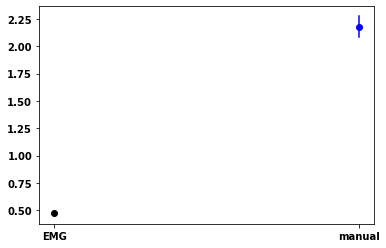

In [60]:
eint_fo,mint_fo = bootstrap(bo_fo)
print(eint_fo,mint_fo,idx_fo)

plt.figure()
plt.plot([1, 1], [eint_fo[0],eint_fo[1]], color='k')
plt.plot(1, np.mean(eint_fo),'o',color='k')
plt.plot([2, 2], [mint_fo[0],mint_fo[1]], color='b')
plt.plot(2, np.mean(mint_fo),'o',color='b')
plt.xticks([1, 2], ['EMG', 'manual']);

In [28]:
for idx,val in enumerate(avs2):
    print(vals[idx],val)

3 4.539947880944001
4 5.990066495784051
4.5 6.602906186269931
5 5.688672912849441
5.5 6.3458100844059935
6 5.512654500412265
7 5.691274590181377
8 4.281233750519246
0 5.4934639515180494


In [39]:
avs2 = []
for v in vals:
    m,bo = runAll(emg_so,man_so,v,1000)
    avs2.append(m)
    
idx_so,bo_so = findModel(emg_so,man_so,avs2,vals,1000)

C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\bookw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


(21.295049800320527, 21.31000868343216) (30.774946842627866, 30.808119526577958) 8


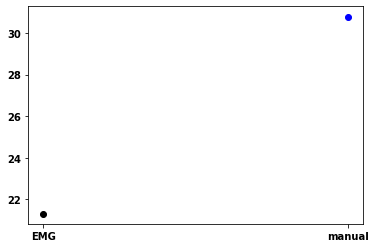

In [61]:
eint_so,mint_so = bootstrap(bo_so)
print(eint_so,mint_so,idx_so)


plt.figure()
plt.plot([1, 1], [eint_so[0],eint_so[1]], color='k')
plt.plot(1, np.mean(eint_so),'o',color='k')
plt.plot([2, 2], [mint_so[0],mint_so[1]], color='b')
plt.plot(2, np.mean(mint_so),'o',color='b')
plt.xticks([1, 2], ['EMG', 'manual']);

In [44]:
eint_so[1]

21.302144133168976

# download data for CPHS 

In [ ]:
Ferr = {}
timeerr = {}
BA = {}
FA = {}
Bonly = {}
time = {}
FREQ = {}

subjects = np.asarray(['ef','dp','gy','iz','ly','wv','zu'])
for key in subjects:
    print('analyzing data for '+key)
    Ferr[key],timeerr[key],BA[key],FA[key],Bonly[key],time[key],FREQ[key] = geterr(key,soM)

In [ ]:
ronly_time = {}
donly_time = {}
key = 'dp'
for key in subjects:
    so_keys = [x for x in time[key].keys() if 'so_' in x]
    donly_time[key] = np.asarray([time[key][x] for x in so_keys if 'r-zer' in x])
    ronly_time[key] = np.asarray([time[key][x] for x in so_keys if 'd-zer' in x])

In [ ]:
# want to save stuff
data = [subjects, donly_time,ronly_time]
with open('donly_ronly.pkl', 'wb') as outfile:
    pickle.dump(data, outfile, pickle.HIGHEST_PROTOCOL)